## Recommending IT Career Paths Based on Skills and Interests


### Ingest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MultiLabelBinarizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, pairwise_distances
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### Data preprocessing

- Enccoding categorical features and scaling numerical features

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

Since we want to cluster relevant information to guide future devs and IT professionals ; these are some of the clusters are relevent.

### Job profiles and roles
- `DevType`: This column represents the type of developer or IT professional the respondent identifies as, which is crucial for understanding job profiles.

### Skills and Technologies
- `LanguageHaveWorkedWith`: Lists programming languages the respondent has experience with, which is key for matching job profiles to skills
- `DatabaseHaveWorkedWith`: Similar to programming languages, these columns focus on database technologies
- `PlatformHaveWorkedWith`: Platforms (e.g., cloud services) the respondent has experience with or is interested in.
- `ToolsTechHaveWorkedWith`: Tools and technologies used in professional work.
- `AISearchHaveWorkedWith`: AI search technologies the respondent has experience with or is interested in.
- `AIDevHaveWorkedWith`: AI development tools the respondent has used or wants to learn.

### Experience and Education
- `YearsCode`: Total years of coding experience, which helps in gauging expertise levels.
- `YearsCodePro`: Professional coding experience, important for understanding skill maturity.
- `EdLevel`: The respondent’s education level, which could correlate with job profiles and career paths.
- `LearnCodeCoursesCert`: Information on whether the respondent has taken courses or certifications, relevant for students seeking similar paths.

### Technology Adoption and Usage
- `ProfessionalTech`: Technologies used professionally, relevant for matching skills to job profiles.
- `Industry`: The industry the respondent works in, which might influence the type of technologies used and required skills.



In [ ]:
# picking relevant columns

columns = ['DevType', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
           'PlatformHaveWorkedWith','ToolsTechHaveWorkedWith','AISearchHaveWorkedWith' ,
           'AIDevHaveWorkedWith','YearsCodePro','YearsCode','EdLevel','LearnCodeCoursesCert','ProfessionalTech',
           'Industry']

In [ ]:
df = df[columns]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DevType                  76872 non-null  object
 1   LanguageHaveWorkedWith   87140 non-null  object
 2   DatabaseHaveWorkedWith   73435 non-null  object
 3   PlatformHaveWorkedWith   63628 non-null  object
 4   ToolsTechHaveWorkedWith  77884 non-null  object
 5   AISearchHaveWorkedWith   56328 non-null  object
 6   AIDevHaveWorkedWith      25904 non-null  object
 7   YearsCodePro             66136 non-null  object
 8   YearsCode                87435 non-null  object
 9   EdLevel                  87973 non-null  object
 10  LearnCodeCoursesCert     37076 non-null  object
 11  ProfessionalTech         41783 non-null  object
 12  Industry                 36774 non-null  object
dtypes: object(13)
memory usage: 8.8+ MB


In [ ]:
# taking care of missing values
df = df.dropna()


In [ ]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

<ipython-input-37-8c337c22a35b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
<ipython-input-37-8c337c22a35b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')


In [ ]:
df['YearsCodePro'].fillna(0, inplace=True)
df['YearsCode'].fillna(0, inplace=True)

<ipython-input-38-0cab8737bc4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'].fillna(0, inplace=True)
<ipython-input-38-0cab8737bc4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCode'].fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 1 to 89183
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DevType                  3849 non-null   object 
 1   LanguageHaveWorkedWith   3849 non-null   object 
 2   DatabaseHaveWorkedWith   3849 non-null   object 
 3   PlatformHaveWorkedWith   3849 non-null   object 
 4   ToolsTechHaveWorkedWith  3849 non-null   object 
 5   AISearchHaveWorkedWith   3849 non-null   object 
 6   AIDevHaveWorkedWith      3849 non-null   object 
 7   YearsCodePro             3849 non-null   float64
 8   YearsCode                3849 non-null   float64
 9   EdLevel                  3849 non-null   object 
 10  LearnCodeCoursesCert     3849 non-null   object 
 11  ProfessionalTech         3849 non-null   object 
 12  Industry                 3849 non-null   object 
dtypes: float64(2), object(11)
memory usage: 421.0+ KB


In [ ]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, full-stack', 'Engineer, data', 'Engineering manager',
       'Cloud infrastructure engineer', 'Developer, mobile',
       'Research & Development role', 'Blockchain', 'DevOps specialist',
       'Data scientist or machine learning specialist',
       'Other (please specify):', 'Developer, QA or test',
       'Developer, front-end', 'Academic researcher',
       'Developer, desktop or enterprise applications',
       'System administrator', 'Developer Experience',
       'Engineer, site reliability', 'Security professional',
       'Project manager', 'Educator', 'Database administrator',
       'Developer, game or graphics', 'Developer Advocate',
       'Developer, embedded applications or devices', 'Product manager',
       'Data or business analyst', 'Student', 'Designer', 'Scientist',
       'Marketing or sales professional', 'Hardware Engineer'],
      dtype=object)

In [ ]:
df['Industry'].unique()

array(['Information Services, IT, Software Development, or other Technology',
       'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain', 'Healthcare',
       'Oil & Gas', 'Retail and Consumer Services',
       'Advertising Services', 'Higher Education', 'Insurance',
       'Wholesale', 'Legal Services'], dtype=object)

- Apply MultilabelBinarizer for multiple category columns

In [ ]:
mlb = MultiLabelBinarizer()

# features with multiple values

multi_category_features = ['LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
                          'ToolsTechHaveWorkedWith','AISearchHaveWorkedWith','LearnCodeCoursesCert','ProfessionalTech',
                          'AIDevHaveWorkedWith','ProfessionalTech']


- Splitting the semicolon-separated values and using multilabelbinarizer to encode them


In [ ]:
# Multi-category feature encoding
for col in multi_category_features:
    df[col] = df[col].apply(lambda x: x.split(';') if isinstance(x, str) else x)

for col in multi_category_features:
    mlb_output = mlb.fit_transform(df[col])
    mlb_df = pd.DataFrame(mlb_output, columns=[f"{col}_{cls}" for cls in mlb.classes_])
    df = df.join(mlb_df, rsuffix=f"_{col}")

In [ ]:
# onehot encoding single entry columns
single_entry_features = ['DevType', 'EdLevel', 'Industry']

df_encoded = pd.get_dummies(df, columns=single_entry_features)


In [ ]:
# drop original multi-category columns
df.drop(columns=multi_category_features,axis=1,inplace=True)

# Concatenate the new features with the original DataFrame
df_final = pd.concat([df, df_encoded], axis=1)




In [ ]:
# Check column existence and data types
print(df_final.columns)
print(df_final.dtypes)
print(df_final.head())

Index(['DevType', 'YearsCodePro', 'YearsCode', 'EdLevel', 'Industry',
       'LanguageHaveWorkedWith_APL', 'LanguageHaveWorkedWith_Ada',
       'LanguageHaveWorkedWith_Apex', 'LanguageHaveWorkedWith_Assembly',
       'LanguageHaveWorkedWith_Bash/Shell (all shells)',
       ...
       'Industry_Healthcare', 'Industry_Higher Education',
       'Industry_Information Services, IT, Software Development, or other Technology',
       'Industry_Insurance', 'Industry_Legal Services',
       'Industry_Manufacturing, Transportation, or Supply Chain',
       'Industry_Oil & Gas', 'Industry_Other',
       'Industry_Retail and Consumer Services', 'Industry_Wholesale'],
      dtype='object', length=484)
DevType                                                     object
YearsCodePro                                               float64
YearsCode                                                  float64
EdLevel                                                     object
Industry                          

In [ ]:
df_final = df_final.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
# Ensure all remaining columns are numeric
df_final = df_final.apply(pd.to_numeric, errors='coerce')


In [ ]:
 #Fill any remaining NaN values
df_final.fillna(0, inplace=True)

#### Scaling and PCA

In [ ]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final)


#### Plotting Explained Variance Ratio

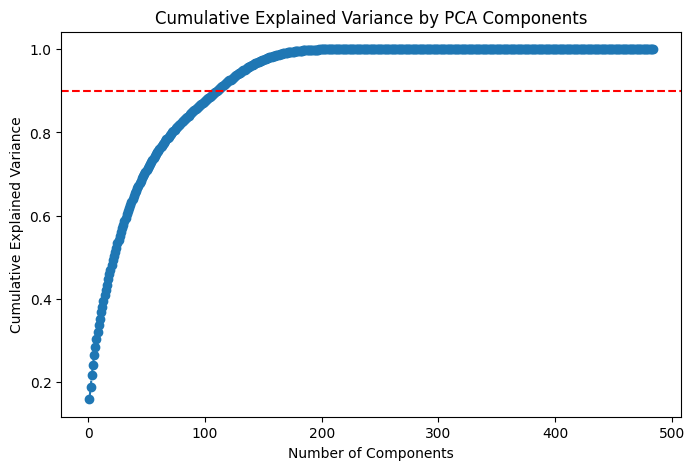

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA without specifying n_components to get the explained variance ratio
pca_full = PCA().fit(scaled_features)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # Add a line for 90% variance
plt.show()


- Based on the cumulative explained variance plot, the optimal number of n_components is the point at which the cumulative explained variance reaches or slightly exceeds the desired threshold, often set around 90%

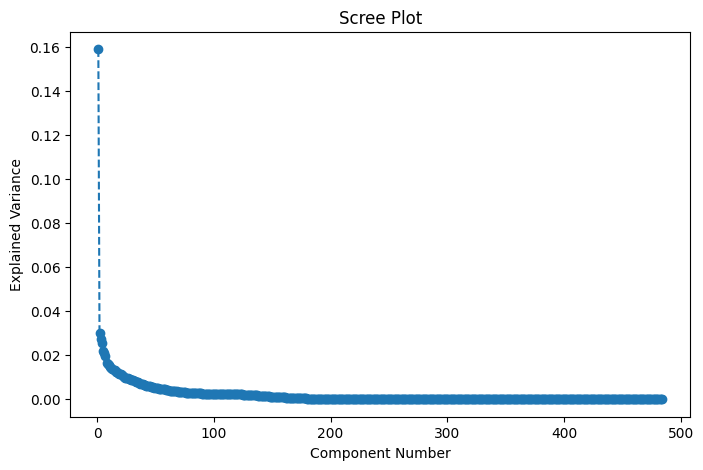

In [ ]:
# Plot the explained variance of each component
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.show()


- A scree plot helps in determining the optimal number of principal components to retain.
- Look for where the curve flattens; this is typically the optimal number of components.
-

In [ ]:
# from the above 2 plots we can conclude that a n_components=6 is good
# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

## Modelling

### K-Means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

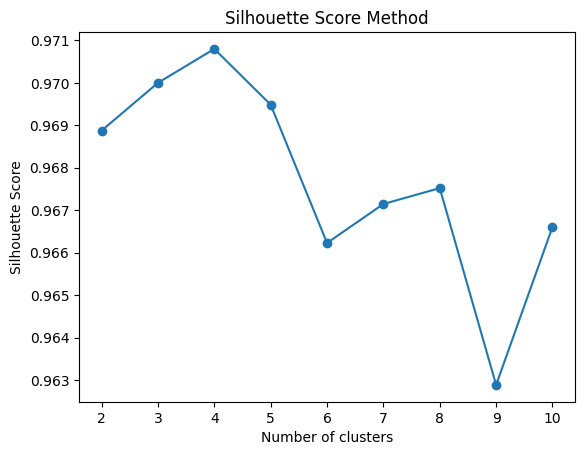

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Start from 2 because silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_features)
    score = silhouette_score(pca_features, clusters)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [ ]:
# using k= 3

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_features)

df['Cluster'] = clusters

df = df.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


- Analyze clustering results

In [ ]:
# Evaluate the clustering using the silhouette score
silhouette_avg = silhouette_score(pca_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.9699989237846207


- A high silhoutte score ie. scores close to 1, show well separated densse cluster.
- Scores near 0, show overlapping and poorly seprated clusters.
- Negative scores , show that the points are assigned to the wrong clusters.

### Recommender system

##### Steps in the recommender system
1. Encode Student Skills

Convert the student's list of skills into a format that matches the one used in the dataset, representing each skill as a binary value (0 or 1).
2. Prepare Features

Combine the encoded skills with the student's years of experience into a single feature set.
3. Standardize Student Features

Ensure that the student’s feature values are scaled consistently with the training data.
4. Apply PCA

Reduce the dimensionality of the student’s features to make them compatible with the clustering model.
5. Predict Cluster

Identify which cluster the student’s features belong to using the clustering model, and filter job profiles to include only those in this cluster.
6. Find Nearest Neighbors

Use a nearest neighbors algorithm to find the most similar job profiles within the predicted cluster.
7. Generate Recommendations

Create a list of recommended job profiles, including confidence scores based on similarity to the student's features.
8. Map Skills and Handle Missing Columns

Convert binary-encoded skills back to readable names and handle any missing columns by adding default values or placeholders.
9. Return Recommendations

Sort the recommendations by confidence score and return the most relevant job profiles.

In [ ]:
relevant_columns = ['YearsCodePro', 'YearsCode', 'LanguageHaveWorkedWith', 'Industry', 'Confidence']

# Define the hybrid recommendation function
def hybrid_recommend_jobs(student_skills, experience_years, k=5, skill_weight=0.8, exp_weight=0.2):
    # Step 1: Encode the student skills to match the original feature space
    skills_dict = {skill: 0 for skill in mlb.classes_ if 'LanguageHaveWorkedWith_' + skill in df.columns}  # Only consider available skills
    for skill in student_skills:
        if skill in skills_dict:
            skills_dict[skill] = 1

    # Create an array of all the multi-category and other encoded features
    multi_category_encoded = np.array(list(skills_dict.values())).reshape(1, -1)

    # Step 2: Prepare the rest of the features (e.g., years of experience and any other single entry features)
    experience_array = np.full((multi_category_encoded.shape[0], 1), experience_years)

    # Combine the multi-category encoded features with years of experience and other features
    student_features = np.concatenate([multi_category_encoded, experience_array], axis=1)

    # Standardize the student's encoded skills
    if student_features.shape[1] != scaled_features.shape[1]:
        padding = np.zeros((student_features.shape[0], scaled_features.shape[1] - student_features.shape[1]))
        student_features = np.concatenate([student_features, padding], axis=1)

    # Scale the student's features
    student_features_scaled = scaler.transform(student_features)

    # Step 3: Apply PCA to the student's features
    student_features_pca = pca.transform(student_features_scaled)

    # Step 4: Predict the cluster for the student's skills
    cluster_prediction = kmeans.predict(student_features_pca)

    # Filter the DataFrame to include only job profiles from the predicted cluster
    filtered_df = df[df['Cluster'] == cluster_prediction[0]]  # Cluster filtering

    if filtered_df.empty:
        print("No job profiles found for the given skills.")
        return None

    # Align the PCA features with the filtered DataFrame's rows
    filtered_pca_features = pca_features[filtered_df.index]

    # Step 5: Use Nearest Neighbors to find the top k job profiles within the predicted cluster
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(filtered_pca_features)  # Fit on the PCA features of the filtered DataFrame

    distances, indices = knn.kneighbors(student_features_pca)

    # Step 6: Return job profiles and confidence scores
    recommendations = filtered_df.iloc[indices[0]].copy()
    recommendations['Confidence'] = 1 - distances[0]  # Higher confidence for closer matches

    # Map binary-encoded skill columns back to readable skills
    recommendations['Key Skills'] = recommendations.apply(lambda row: ', '.join([skill for skill in skills_dict if row.get('LanguageHaveWorkedWith_' + skill, 0) == 1]), axis=1)

    # Dynamically handle industry columns (check if they exist)
    industries = [
        'Information Services, IT, Software Development, or other Technology',
        'Finance', 'Education', 'Healthcare', 'Manufacturing, Transportation, or Supply Chain', 'Other'
    ]
    for industry in industries:
        industry_col = f"Industry_{industry}"
        if industry_col not in df.columns:
            recommendations[industry_col] = False  # Create a default value if the column doesn't exist

    # Extract relevant industry column (only one industry per row for clarity)
    recommendations['Industry'] = recommendations.apply(lambda row:
        'Information Technology' if row.get('Industry_Information Services, IT, Software Development, or other Technology', False)
        else 'Finance' if row.get('Industry_Finance', False)
        else 'Education' if row.get('Industry_Education', False)
        else 'Healthcare' if row.get('Industry_Healthcare', False)
        else 'Manufacturing' if row.get('Industry_Manufacturing, Transportation, or Supply Chain', False)
        else 'Other', axis=1)

    # Check if 'DevType' exists, otherwise skip or add placeholder
    if 'DevType' in df.columns:
        recommendations['DevType'] = filtered_df['DevType']
    else:
        recommendations['DevType'] = 'Unknown'  # Placeholder if 'DevType' is not available

    # Return the relevant columns with sorted recommendations by confidence
    return recommendations[['DevType', 'Key Skills', 'YearsCodePro', 'Industry', 'Confidence']].sort_values(by='Confidence', ascending=False)





In [ ]:
# Example usage
student_skills = ['Python', 'SQL', 'AWS']  # List of skills
experience_years = 5  # Years of experience
recommended_jobs = hybrid_recommend_jobs(student_skills, experience_years)
print(recommended_jobs)

                                            DevType Key Skills  YearsCodePro  \
2367  Data scientist or machine learning specialist                      1.0   
3387                          Developer, full-stack                      2.0   
3417                          Developer, full-stack                      1.0   
3080                          Developer, full-stack                      4.0   
2838                          Developer, full-stack                      5.0   

     Industry  Confidence  
2367    Other    0.999999  
3387    Other    0.999999  
3417    Other    0.999999  
3080    Other    0.999998  
2838    Other    0.999998  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Conclusion

- The job recommendation system aims to streamline career decision-making for students by providing personalized job recommendations based on their skills and experience. This tool not only offers direct career guidance but also contributes to several key performance metrics:

    1. `Higher Enrollment Rate`: By offering clearer career paths and personalized job recommendations, students can make more informed decisions about which courses to pursue, leading to increased enrollment in relevant programs.

    2. `Decrease in Dropout Rate`: Students who feel confident about their career trajectory are less likely to drop out. With tailored job recommendations, students gain a stronger sense of direction and purpose in their studies, leading to higher retention rates.

    3. `Time Saved for Academic Advisors`: Academic advisors can use this tool to efficiently guide students, reducing the time spent on manual research and repetitive counseling. This frees them up to offer more personalized support and address individual concerns.

- The job recommendation system provides high accuracy, as evidenced by a Silhouette Score of 0.97, indicating well-defined clusters of job profiles based on student or professional skills.

- It offers personalized job suggestions for students and professionals, with a confidence score reflecting the strength of the match between the current or future skills of the user and relevant job profiles.

- Additionally, the system predicts the type of developer you are likely to become, the number of years to achieve proficiency in the chosen field, and the industry where you are most likely to work. These insights offer users a comprehensive view of their potential career path.